In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from spikenet.network import Network
from spikenet.dataloader import DataLoader

Firstly we create a class to handle the data and transformation. This class provide some easy access to data, such as getting a sample data, or getting the shape

In [2]:
class MyData(DataLoader):
    def __init__(self):
        super().__init__(
            train_data=torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True),
            test_data=torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
        )

    def x_transform(self, x):
        # Transform data into 1D array
        return x.reshape(-1, 28 * 28)

data = MyData()

Here is an example view of a random data

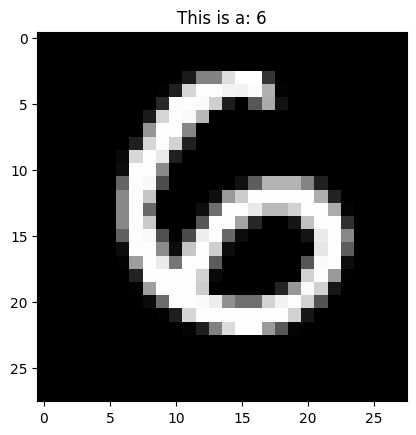

In [3]:
x, y = data.sample()
img = x.reshape(28, 28).numpy()
plt.imshow(img, cmap='gray')
plt.title(f"This is a: {y.item()}")
plt.show()

The next step would be to build a simple network. The network presented below, is a two layer MLP network. as for the `add_layer` you can insert either native pytorch module, spiking layers, or anything inherited from nn.module.

Creating a network this way, would result to an uncompiled network. To compile this there are two ways:
1) provide the input shape (via `in_feature` argument) to the first layer, and then call `compiled_net = net.build`
2) train the network on a data using `compiled_net = net.fit_on(data)`. And the network will get the first layer's shape.

In [6]:
net = (
    Network("Simple Network")
    .add_layer(torch.nn.Linear, 500)
    .add_layer(torch.nn.ReLU, in_features=500)
    .add_layer(torch.nn.Linear, 10)
)

net.summary()

Network: simple network [Uncompiled Network]
--------------------------------------------------
0) Linear (None -> 500)
1) ReLU
2) Linear (500 -> 10)


You can call fit on a network as many time you wish

===== Training Started ======
Epoch 1 | ............................................... | Loss: 2.1985
Epoch 2 | ............................................... | Loss: 2.0786
Epoch 3 | ............................................... | Loss: 1.9839
Epoch 4 | ............................................... | Loss: 1.8380
Epoch 5 | ............................................... | Loss: 1.6871
Epoch 6 | ............................................... | Loss: 1.5282
Epoch 7 | ............................................... | Loss: 1.2603
Epoch 8 | ............................................... | Loss: 1.1715
Epoch 9 | ............................................... | Loss: 1.0422
Epoch 10 | ............................................... | Loss: 0.9013
===== Training Finished =====


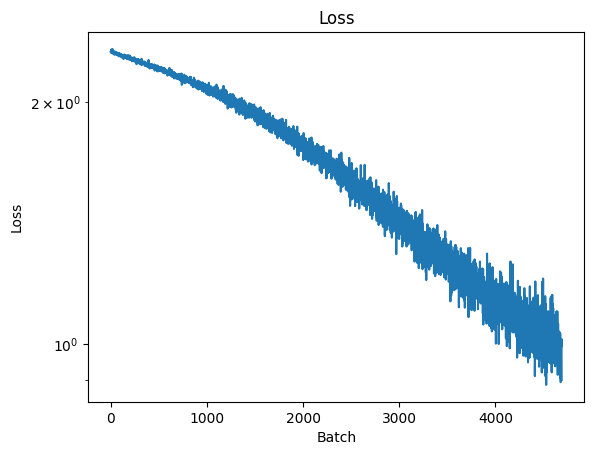

====== Testing Started ======
Accuracy: 8227/10000 = 82.27%
===== Testing Finished ======


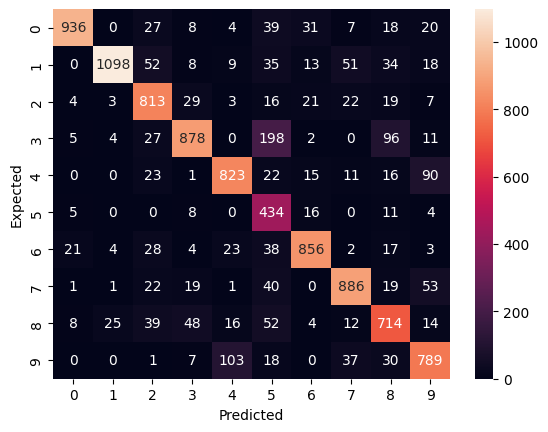

Network: Network
--------------------------------------------------
0) Linear(in_features=784, out_features=500, bias=True)
1) ReLU()
2) Linear(in_features=500, out_features=10, bias=True)


In [5]:
net = net.fit_on(data)
net.summary()